In [0]:
!pip install yfinance
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm


In [0]:
price = yf.download("AAPL")

[*********************100%***********************]  1 of 1 completed


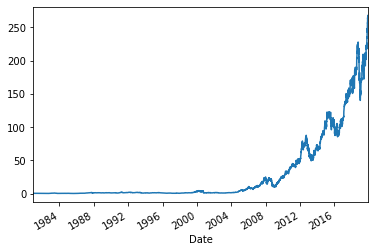

In [0]:
price['Adj Close'].plot()

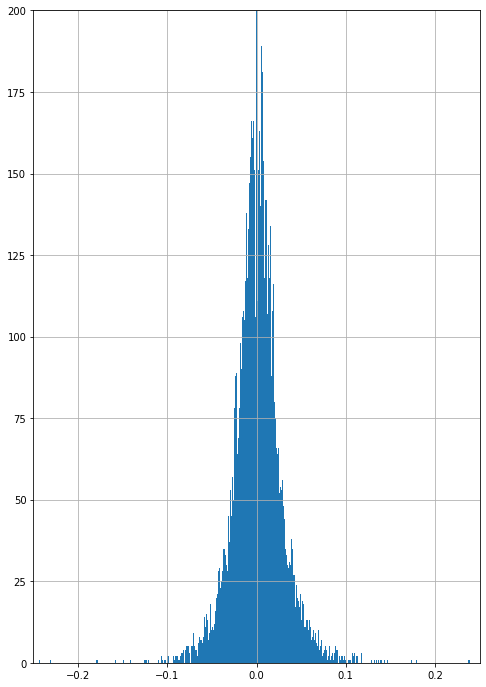

In [0]:
rets = price['Adj Close'] / price['Adj Close'].shift(1) - 1
fig = plt.figure(figsize = (8,12))
ax = fig.gca()
ax.set_ylim(0,200)
ax.set_xlim(-0.25,0.25)
rets.hist(bins=1000,ax=ax)

In [0]:
mean = rets.mean()
var = rets.var()

In [0]:
norm.pdf(0.05,rets.mean(),rets.std())

3.242961141387476

In [0]:
drift = mean - (0.5 * var)
drift

0.0006680757354129386

In [0]:
stddev = rets.std()
stddev

0.028660204785529803

In [0]:
from scipy.stats import norm

time = 1000
paths = 10

probs = np.random.rand(time, paths)
daily_rets = np.exp(drift + stddev * norm.ppf(probs))

In [0]:
probs.sum(axis=0)

array([494.95081738, 512.53238694, 504.16598206, 494.52566627,
       489.83337745, 501.44800487, 495.84848421, 483.51111235,
       493.81611855, 486.97352108])

In [0]:
s0 = price['Adj Close'].iloc[-1]
price_pred = np.zeros_like(daily_rets)
price_pred[0] = s0
for t in range(1, time):
    price_pred[t] = price_pred[t - 1] * daily_rets[t]

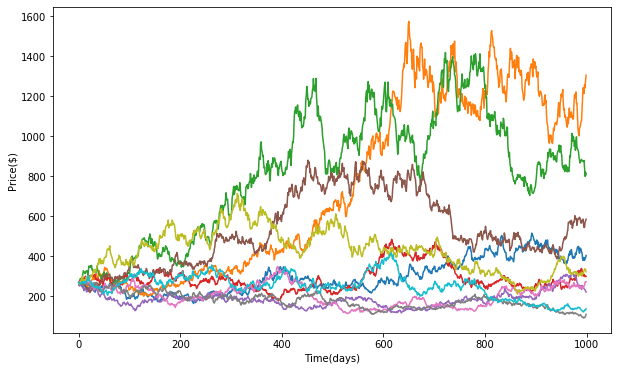

In [0]:
plt.figure(figsize=(10,6))
plt.plot(price_pred)
plt.xlabel('Time(days)')
plt.ylabel('Price($)')
plt.show()

In [0]:
price_pred[-1]

array([ 402.67912262, 1303.75854704,  806.19354601,  298.2530304 ,
        219.93145194,  584.02968979,  271.34023245,  108.33487597,
        320.44184768,  136.45931933])

In [0]:
diff = np.zeros_like(daily_rets)
for t in range(1, time):
    diff[t-1] = (price_pred[t] - price_pred[t - 1])/price_pred[t - 1]

In [0]:
diff

array([[-0.01008661, -0.0030072 , -0.01038144, ..., -0.05459845,
        -0.03249773, -0.01615568],
       [ 0.01591957, -0.03119271,  0.05689986, ...,  0.01267518,
         0.0226718 ,  0.00328212],
       [-0.03048396, -0.0133436 ,  0.02769364, ...,  0.02729027,
        -0.01055903, -0.02155857],
       ...,
       [ 0.00371593,  0.03036748,  0.02598645, ...,  0.08097085,
        -0.0125746 , -0.00769302],
       [ 0.02960762,  0.01925396, -0.01573974, ...,  0.07032698,
        -0.03511342,  0.04734408],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ]])

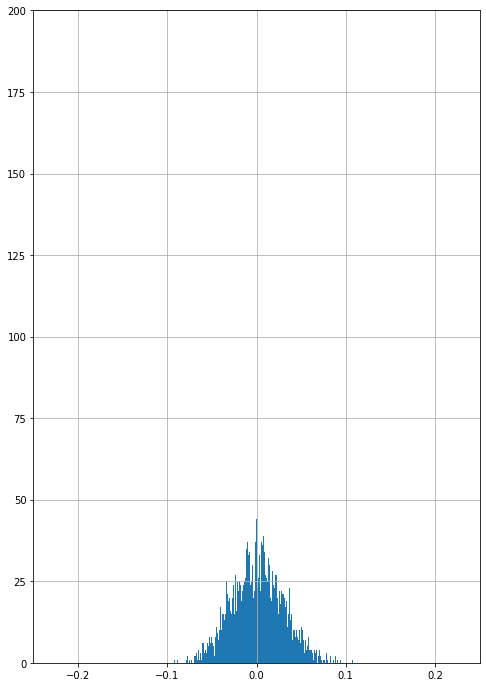

In [0]:
gen_ret = pd.Series(diff.flatten())
fig = plt.figure(figsize = (8,12))
ax = fig.gca()
ax.set_ylim(0,200)
ax.set_xlim(-0.25,0.25)
gen_ret.hist(bins=1000,ax=ax)

In [0]:
norm.pdf(0.05,diff.mean(),diff.std()) - norm.pdf(0.05,rets.mean(),rets.std())

-0.04322954968679005

In [0]:
print(gen_ret.quantile(0.05))
print(rets.quantile(0.05))
print(gen_ret.quantile(0.01))
print(rets.quantile(0.01))

-0.04581331626105389
-0.0416606773394755
-0.06362487348599832
-0.0711425634927405


In [0]:
from sklearn.metrics import mutual_info_score

mutual_info_score(rets[1:9000],gen_ret[1:9000])

8.80651296358375

In [0]:
rets

Date
1980-12-12         NaN
1980-12-15   -0.052174
1980-12-16   -0.073394
1980-12-17    0.024752
1980-12-18    0.028986
                ...   
2019-11-21   -0.004483
2019-11-22   -0.000878
2019-11-25    0.017534
2019-11-26   -0.007809
2019-11-27    0.013432
Name: Adj Close, Length: 9824, dtype: float64

In [0]:
gan_rets = pd.read_csv('gdrive/My Drive/Colab Notebooks/gan')['0']

In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
import numpy as np
import pandas as pd
import scipy.stats 


def KL_divergence(a, b, no_bins):
    hist_a = np.histogram(a, bins=no_bins, range=(-1.5,1.5))[0]
    hist_b = np.histogram(b, bins=no_bins, range=(-1.5,1.5))[0]
    hist_b = np.where(hist_b == 0.0, 1e-6, hist_b)
    return scipy.stats.entropy(hist_a, hist_b)

print(KL_divergence(rets[1:9500],gen_ret[1:9500],int(10e4)))
print(KL_divergence(gen_ret[1:9500],rets[1:9500],int(10e4)))
print(KL_divergence(rets[1:9500],gan_rets[1:9500],int(10e4)))
print(KL_divergence(gan_rets[1:9500],rets[1:9500],int(10e4)))

1.9588078168622625
3.0001676031500457
7.155841564194154
10.180867728820251


In [0]:
a = [-0.0638563294718091 ,-0.061432426001024956, -0.06272439205070993 ,-0.0626472489184313,-0.06362487348599832]
print(np.mean(a))
print(np.std(a))

-0.06285705398559473
0.0008578205560772187
